<div class="alert alert-block alert-danger">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>No aprobado</b>

Has tenido un buen inicio de proyecto, el avance es muy grande, existe un error casi al final el cual debe ser corregido. Si tienes alguna pregunta me puedes dejar un mensaje y con gusto te responderé
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Sprint 11 - Proyecto

### *INSTRUCCIONES*

**Descripción del proyecto**

Trabajas en la compañía de extracción de petróleo OilyGiant. Tu tarea es encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo.

Para completar esta tarea, tendrás que realizar los siguientes pasos:

Leer los archivos con los parámetros recogidos de pozos petrolíferos en la región seleccionada: calidad de crudo y volumen de reservas.
Crear un modelo para predecir el volumen de reservas en pozos nuevos.
Elegir los pozos petrolíferos que tienen los valores estimados más altos.
Elegir la región con el beneficio total más alto para los pozos petrolíferos seleccionados.
Tienes datos sobre muestras de crudo de tres regiones. Ya se conocen los parámetros de cada pozo petrolero de la región. Crea un modelo que ayude a elegir la región con el mayor margen de beneficio. Analiza los beneficios y riesgos potenciales utilizando la técnica bootstrapping.

**Condiciones:**

Solo se debe usar la regresión lineal para el entrenamiento del modelo.
Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.
El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.
Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).
Después de la evaluación de riesgo, mantén solo las regiones con riesgo de pérdidas inferior al 2.5%. De las que se ajustan a los criterios, se debe seleccionar la región con el beneficio promedio más alto.
Los datos son sintéticos: los detalles del contrato y las características del pozo no se publican.

#### 1.-Descarga y prepara los datos. Explica el procedimiento.

In [1]:
#importar librerias de pandas
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats as st

In [2]:
#Descarga de archivos csv.
geodata_0 = pd.read_csv("/datasets/geo_data_0.csv")
geodata_1 = pd.read_csv("/datasets/geo_data_1.csv")
geodata_2 = pd.read_csv("/datasets/geo_data_2.csv")

In [3]:
#visualizacion del primer df
print(geodata_0.head())

print(geodata_0.info())

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


In [4]:
#visualizacion del segundo df
print(geodata_1.head())

print(geodata_1.info())

      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


In [5]:
#visualizacion del tercer df
print(geodata_2.head())

print(geodata_2.info())

      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


In [6]:
geodata_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [7]:
#transformacion de datos tipo objeto a categoricos de la columna "id"
geodata_0 ["id"] = geodata_0 ["id"].astype("category")
geodata_0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [8]:
geodata_0.rename(columns={"f0":"zona0",
                                      "f1":"zona1",
                                      "f2":"zona2"}, inplace=True)

In [9]:
#Eliminamos la columna de "id"
region_0 = geodata_0.drop(["id"], axis=1)
region_0

,zona0,zona1,zona2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...
99995,0.971957,0.370953,6.075346,110.744026
99996,1.392429,-0.382606,1.273912,122.346843
99997,1.029585,0.018787,-1.348308,64.375443
99998,0.998163,-0.528582,1.583869,74.040764


In [10]:
#Ordenar los datos de mayor a menor por product
region_0 = region_0.sort_values(by=["product"],ascending=False)
region_0

,zona0,zona1,zona2,product
8826,1.797736,0.098212,6.148260,185.364347
99818,0.518445,-0.412790,4.951916,185.362690
94175,0.351428,-0.400244,7.227618,185.355615
1925,0.624430,-0.469312,5.753677,185.354980
45291,1.758787,-0.395038,6.719085,185.352015
...,...,...,...,...
55969,-0.792553,0.439711,-0.696314,0.021781
5105,-0.701882,0.570246,2.288005,0.009428
58769,-0.702486,0.523053,-1.224802,0.006114
97721,0.701532,0.808797,-2.221334,0.004022


In [11]:
#redondear valores #no rendondear
region_0[["reservas"]] = geodata_0["product"]
region_0

,zona0,zona1,zona2,product,reservas
8826,1.797736,0.098212,6.148260,185.364347,185.364347
99818,0.518445,-0.412790,4.951916,185.362690,185.362690
94175,0.351428,-0.400244,7.227618,185.355615,185.355615
1925,0.624430,-0.469312,5.753677,185.354980,185.354980
45291,1.758787,-0.395038,6.719085,185.352015,185.352015
...,...,...,...,...,...
55969,-0.792553,0.439711,-0.696314,0.021781,0.021781
5105,-0.701882,0.570246,2.288005,0.009428,0.009428
58769,-0.702486,0.523053,-1.224802,0.006114,0.006114
97721,0.701532,0.808797,-2.221334,0.004022,0.004022


In [12]:
#Eliminamos la columna de "product"
region_0 = region_0.drop(["product"], axis=1)
region_0

,zona0,zona1,zona2,reservas
8826,1.797736,0.098212,6.148260,185.364347
99818,0.518445,-0.412790,4.951916,185.362690
94175,0.351428,-0.400244,7.227618,185.355615
1925,0.624430,-0.469312,5.753677,185.354980
45291,1.758787,-0.395038,6.719085,185.352015
...,...,...,...,...
55969,-0.792553,0.439711,-0.696314,0.021781
5105,-0.701882,0.570246,2.288005,0.009428
58769,-0.702486,0.523053,-1.224802,0.006114
97721,0.701532,0.808797,-2.221334,0.004022


In [13]:
region_0 ["reservas"].value_counts().sort_values()

116.482251    1
134.053493    1
84.511011     1
85.413965     1
148.731682    1
             ..
113.199516    1
132.822976    1
33.163621     1
78.664946     1
154.424007    1
Name: reservas, Length: 100000, dtype: int64

In [14]:
region_0["reservas"].unique()

array([1.85364347e+02, 1.85362690e+02, 1.85355615e+02, ...,
       6.11363631e-03, 4.02152316e-03, 0.00000000e+00])

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de leer los datos y de hacer una revisión inicial
</div>


Ya con la limpieza de datos y teniendo solo los pozos con reservas de mas de 111.1 unidades para poder producir 500,000 dolares por unidad.

### 2.-Entrena y prueba el modelo para cada región 

#### 1.- Divide, entrena y prueba el modelo para cada región en geo_data_0.csv:

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Cuidado!<br/>

Las librerias deberian leerse una sola vez, además de que deberian estar al inicio del proyecto
</div>


In [15]:
#Media de las zonas 
print("La media de antes:", region_0.mean())

La media de antes: zona0        0.500419
zona1        0.250143
zona2        2.502647
reservas    92.500000
dtype: float64


In [16]:
#Diviri en variables dependientes e independientes (x y y)
X = region_0['zona0'].values.reshape(-1,1)
y = region_0['reservas'].values

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Cuidado!<br/>

Hizo falta importar estas librerias
</div>


In [17]:
#Dividir el conjunto de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=12345)

In [18]:
#
print(X_train.shape)
print(y_train.shape)

(25000, 1)
(25000,)


In [19]:
#Crear el modelo de regresion lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
#Valores de la predicion del modelo
predicted_train = model.predict(X_test)
predicted_train

array([ 86.56454719,  93.75706409, 101.59468072, ...,  94.25292432,
       101.92830562,  96.64027002])

In [21]:
#Calificacion del modelo y calculando las predicciones
predicted_train
print("predicciones: {}, Reales: {}".format(predicted_train[:5], y_test[:5]))

predicciones: [ 86.56454719  93.75706409 101.59468072  86.74166333  93.63147378], Reales: [ 60.57305525  49.58280635 171.3384567   86.83321544  30.66198457]


In [22]:
#Volumen medio 
volumen_medio = predicted_train.mean()
volumen_medio 

92.92032839157315

In [23]:
#Mejorando el modelo con RMSE
RMSE = mean_squared_error(y_test, predicted_train, squared=False)
print("RMSE:", RMSE)

RMSE: 43.80390956163805


Este modelo que se creo es con una sola variable en este caso es con los datos de la zona0, por lo que trataremos de crear este modelo nuevamente con regresion lineal multiple para comparar resultados. 

<div class="alert alert-block alert-success">
<b>Comentario delxrevisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Buena manera de construir una función para entrenar y validar el modelo
</div>


In [24]:
region_0.describe()

,zona0,zona1,zona2,reservas
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


##### "Modelo de regresion lineal multiple con geo_data_0.csv"

Predicciones: [ 86.41936697  80.23726194  72.49803905 119.41697289  87.69436287], Reales: 58512     55.630153
91545     49.961046
88834    135.248818
22447     54.355426
18405     27.449020
Name: reservas, dtype: float64
RMSE = 37.75209074037667
volumen_medio = 92.61789358449005
R2 = 0.27073878075167257


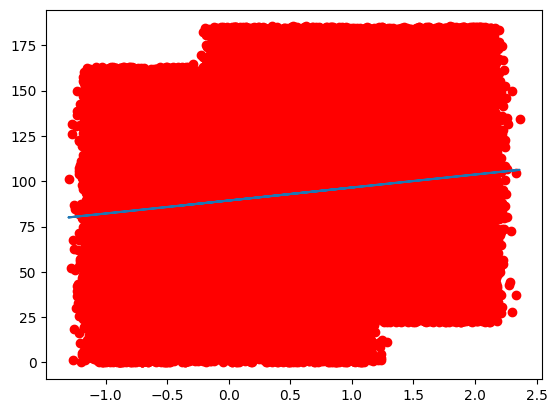

In [25]:
#Entrenar modelo de regresion multiple y conjunato de validacion.
X = region_0.drop(columns=['reservas'], axis=1,).values  # 'product' es la variable objetivo
y = region_0['reservas']
    
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)
    
modelo = LinearRegression()
modelo.fit(X_train, y_train)
    
predicciones = modelo.predict(X_valid)
rmse = mean_squared_error(y_valid, predicciones, squared=False)
volumen_medio = predicciones.mean()


print("Predicciones: {}, Reales: {}".format(predicciones[:5], y_valid[:5]))
print("RMSE =",rmse)
print("volumen_medio =",volumen_medio)
print('R2 =', r2_score(y_valid,predicciones))

#graficar valores de region0 
plt.plot(X_test, y_test, "ro")
plt.plot(X_test, predicted_train)
plt.show()

<AxesSubplot:xlabel='reservas'>

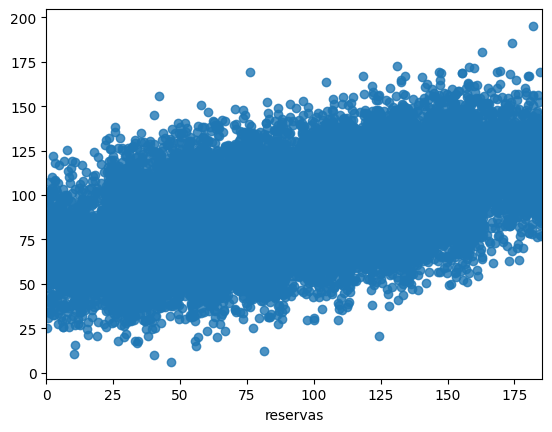

In [26]:
#Graficar con seaborn
import seaborn as sns
X = region_0.drop(columns=['reservas'], axis=1,).values  # 'product' es la variable objetivo
y = region_0['reservas']
    
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)
    
modelo = LinearRegression()
modelo.fit(X_train, y_train)
    
predicciones = modelo.predict(X_valid)
rmse = mean_squared_error(y_valid, predicciones, squared=False)
volumen_medio = predicciones.mean()

sns.regplot(x = y_valid, y = predicciones)

**Como conclucion, podemos observar que se tienen muchos datos y que este modelo quedo bastante defectuoso ya que el R2 quedo muy debajo de 1, asi el RMSE quedo muy alto y no cercano a 0 para un modelo mas preciso. 
Por lo que continuaremos trabajando con los otros dos df.**

#### 2.- Divide, entrena y prueba el modelo para cada región en geo_data_1.csv:

In [27]:
#Renombrar columnas
geodata_1.rename(columns={"f0":"zona0",
                                      "f1":"zona1",
                                      "f2":"zona2"}, inplace=True)

In [28]:
#Eliminamos la columna de "id"
region_1 = geodata_1.drop(["id"], axis=1)
region_1

,zona0,zona1,zona2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...
99995,9.535637,-6.878139,1.998296,53.906522
99996,-10.160631,-12.558096,5.005581,137.945408
99997,-7.378891,-3.084104,4.998651,137.945408
99998,0.665714,-6.152593,1.000146,30.132364


In [29]:
region_1.rename(columns={"product":"Reservas_1"}, inplace=True)
region_1

,zona0,zona1,zona2,Reservas_1
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...
99995,9.535637,-6.878139,1.998296,53.906522
99996,-10.160631,-12.558096,5.005581,137.945408
99997,-7.378891,-3.084104,4.998651,137.945408
99998,0.665714,-6.152593,1.000146,30.132364


In [30]:
region_1.describe()

,zona0,zona1,zona2,Reservas_1
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


##### "Modelo de regresion lineal multiple con geo_data_1.csv"

Predicciones_1: [ 8.44738063e-01  5.29216119e+01  1.35110385e+02  1.09494863e+02
 -4.72915824e-02], Reales: 75721      0.000000
80184     53.906522
19864    134.766305
76699    107.813044
92991      0.000000
Name: Reservas_1, dtype: float64
RMSE_1 = 0.8902801001028905
volumen_medio_1 = 68.71287803913717
R2_1 = 0.9996245232002449


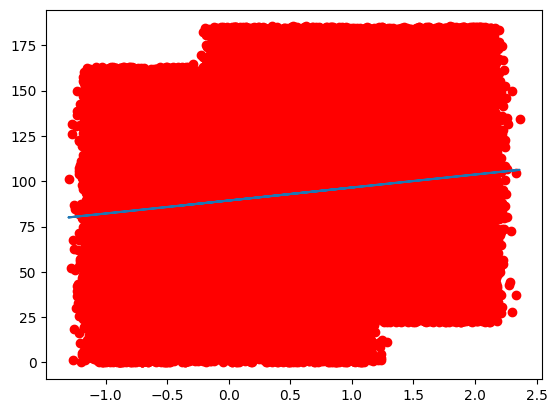

In [31]:
#Entrenar modelo de regresion multiple y conjunato de validacion.
X = region_1.drop(columns=['Reservas_1'], axis=1,).values  # 'product' es la variable objetivo
y = region_1['Reservas_1']
    
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)
    
modelo = LinearRegression()
modelo.fit(X_train, y_train)
    
predicciones = modelo.predict(X_valid)
rmse = mean_squared_error(y_valid, predicciones, squared=False)
volumen_medio = predicciones.mean()


print("Predicciones_1: {}, Reales: {}".format(predicciones[:5], y_valid[:5]))
print("RMSE_1 =",rmse)
print("volumen_medio_1 =",volumen_medio)
print('R2_1 =', r2_score(y_valid,predicciones))

#graficar valores de region0 
plt.plot(X_test, y_test, "ro")
plt.plot(X_test, predicted_train)
plt.show()

**Como conclucion, podemos observar que se tienen un mejor modelo y mas preciso tanto como el RMSE ya con un 0.89 casi cercano a 0 y un R2 con 0.999 casi 1 por lo que es casi excacto**

#### 3.- Divide, entrena y prueba el modelo para cada región en geo_data_2.csv:

In [32]:
#Renombrar columnas
geodata_2.rename(columns={"f0":"zona0",
                          "f1":"zona1",
                          "f2":"zona2",
                          "product":"Reservas_2"},
                 inplace=True)

In [33]:
#Eliminamos la columna de "id"
region_2 = geodata_2.drop(["id"], axis=1)
region_2

,zona0,zona1,zona2,Reservas_2
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...
99995,-1.777037,1.125220,6.263374,172.327046
99996,-1.261523,-0.894828,2.524545,138.748846
99997,-1.199934,-2.957637,5.219411,157.080080
99998,-2.419896,2.417221,-5.548444,51.795253


In [34]:
region_2.describe()

,zona0,zona1,zona2,Reservas_2
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


##### "Modelo de regresion lineal multiple con geo_data_2.csv"

Predicciones_2: [ 8.44738063e-01  5.29216119e+01  1.35110385e+02  1.09494863e+02
 -4.72915824e-02], Reales: 75721    117.441301
80184     47.841249
19864     45.883483
76699    139.014608
92991     84.004276
Name: Reservas_2, dtype: float64
RMSE_2 = 69.44009022977963
volumen_medio_2 = 68.71287803913717
R2_2 = 0.19634705977280464


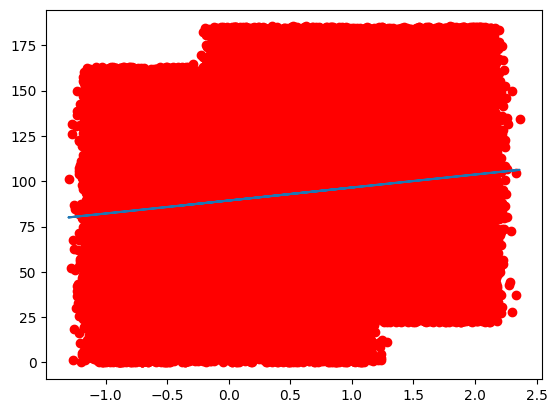

In [35]:
#Entrenar modelo de regresion multiple y conjunato de validacion.
X = region_2.drop(columns=['Reservas_2'], axis=1,).values  # 'product' es la variable objetivo
y = region_2['Reservas_2']
    
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)
    
modelo = LinearRegression()
modelo.fit(X_train, y_train)
    
predicciones_2 = modelo.predict(X_valid)
rmse_2 = mean_squared_error(y_valid, predicciones, squared=False)
volumen_medio_2 = predicciones.mean()


print("Predicciones_2: {}, Reales: {}".format(predicciones[:5], y_valid[:5]))
print("RMSE_2 =",rmse_2)
print("volumen_medio_2 =",volumen_medio_2)
print('R2_2 =', r2_score(y_valid,predicciones_2))

#graficar valores de region0 
plt.plot(X_test, y_test, "ro")
plt.plot(X_test, predicted_train)
plt.show()

**Como conclucion, podemos observar que se tienen muchos datos y que este modelo quedo bastante defectuoso ya que el R2 quedo muy debajo de 1, asi el RMSE quedo muy alto y no cercano a 0 para un modelo mas preciso. 
Por lo que continuaremos trabajando con los otros dos df.**

#### **Como conlcuion final despues de entrenar los 3 diferentes modelos en las 3 diferentes zonas se concluye que el mejor modelo para continuar es con el DF region_1.**

<div class="alert alert-block alert-success">
<b>Comentario delxrevisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Las regiones fueron evaluadas correctamente, podemos ver que hay variaciones entre ellas, además de que el error es elevado, por lo que no son calculos muy fiables
</div>


### 3.-cálculo de ganancias

In [36]:
#Almacenar los datos 
Inversion = 100,000,000 
n_pozos = 200 
B_operativo = 500,000

In [37]:
def calcular_ganancia(predicciones, reales, costo_pozos=100_000_000, n_pozos=200):
    top_200 = np.argsort(predicciones)[-n_pozos:]
    ganancias = reales.iloc[top_200].sum() * 1000  # cada unidad vale $1000
    inversion = costo_pozo
    return ganancias - inversion

Como conclucion, tenemos que escoger los mejores 200 pozos de las muestras y multiplicarlo por 1000 para obtener las ganacias, 

### 4.-Escribe una función para calcular la ganancia de un conjunto de pozos de petróleo seleccionados y modela las predicciones:

In [38]:
region_0_200 = region_0.sort_values(by=["reservas"],ascending=False)
print(region_0_200.head(200))

          zona0     zona1     zona2    reservas
8826   1.797736  0.098212  6.148260  185.364347
99818  0.518445 -0.412790  4.951916  185.362690
94175  0.351428 -0.400244  7.227618  185.355615
1925   0.624430 -0.469312  5.753677  185.354980
45291  1.758787 -0.395038  6.719085  185.352015
...         ...       ...       ...         ...
34856  2.038708  0.271003  3.791803  184.366474
54135  1.108500 -0.583939  1.503254  184.362338
63598  1.330398 -0.523232  6.365799  184.360762
4941   1.674001  0.016279  3.869249  184.358756
79494  1.313813 -0.459792  9.423778  184.356455

[200 rows x 4 columns]


In [39]:
# Abre los archivos
# toma el índice “0” para convertir los datos a pd-Series
#Entrenar modelo de regresion multiple y conjunato de validacion.
X = region_1.drop(columns=['Reservas_1'], axis=1,).values  # 'product' es la variable objetivo
y = region_1['Reservas_1']
    
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)
    
modelo = LinearRegression()
modelo.fit(X_train, y_train)
    
predicciones = modelo.predict(X_valid)

target = region_1['Reservas_1']
probabilities = region_1['Reservas_1']


def revenue(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)#|
    selected = target[probs_sorted.index][:count]
    return 10 * selected.sum()

state = np.random.RandomState(200)
    
values = []
for i in range(1000):
    target_subsample = target.sample(n=25, replace=True, random_state=state)
    probs_subsample = probabilities[target_subsample.index]
    
    values.append(revenue(target_subsample, probs_subsample, 10))

values = pd.Series(values)
lower = values.quantile(0.01) # < escribe tu código aquí >

mean = values.mean()
print("Ingresos promedio:", mean)
print("Cuantil del 1 %:", lower)

Ingresos promedio: 11416.185020667504
Cuantil del 1 %: 8815.471774826816


**Ya se obtuvieron los ingresos promedio por lo que necesitamos ya solo0 calcular los riesgos y las ganancias por region.** 

<div class="alert alert-block alert-success">
<b>Comentario delxrevisor</b> <a class="tocSkip"></a><br />
Corregido!<br/>


</div>


<div class="alert alert-block alert-danger">
<b>Comentario delxrevisor</b> <a class="tocSkip"></a><br />
Cuidado!<br/>

Existe un error en el código, se esta tratando de accesar a la columna `'0'` la cual no existe dentro del conjunto de datos, debes utilizar la palabra correcta para accesar a los datos que requieres
</div>


### 5.-Calcula riesgos y ganancias para cada región

In [40]:
X = region_0.drop(columns=['reservas'], axis=1,).values  
y = region_0['reservas']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)
    
modelo = LinearRegression()
modelo.fit(X_train, y_train)
    
predicciones = modelo.predict(X_valid)

target = region_0['reservas']
probabilities = region_0['reservas']

def revenue(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return 10 * selected.sum()

state = np.random.RandomState(200)
    
values = []
for i in range(1000):
    target_subsample = target.sample(n=25, replace=True, random_state=state)
    probs_subsample = probabilities[target_subsample.index]
    
    values.append(revenue(target_subsample, probs_subsample, 10))#< escribe tu código aquí >)

values = pd.Series(values)
lower = values.quantile(0.01) # < escribe tu código aquí >

mean = values.mean()
print("Ingresos promedio:", mean)
print("Cuantil del 1 %:", lower)

Ingresos promedio: 13626.579343344736
Cuantil del 1 %: 11367.786206550563


In [41]:
X = region_2.drop(columns=['Reservas_2'], axis=1,).values  
y = region_2['Reservas_2']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)
    
modelo = LinearRegression()
modelo.fit(X_train, y_train)
    
predicciones = modelo.predict(X_valid)

target = region_2['Reservas_2']
probabilities = region_2['Reservas_2']

def revenue(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return 10 * selected.sum()

state = np.random.RandomState(200)
    
values = []
for i in range(1000):
    target_subsample = target.sample(n=25, replace=True, random_state=state)
    probs_subsample = probabilities[target_subsample.index]
    
    values.append(revenue(target_subsample, probs_subsample, 10))#< escribe tu código aquí >)

values = pd.Series(values)
lower = values.quantile(0.01) # < escribe tu código aquí >

mean = values.mean()
print("Ingresos promedio:", mean)
print("Cuantil del 1 %:", lower)

def bootstrapping_ganancia(reales, predicciones, n_iter=1000, n_pozos=200, costo_pozo=100_000_000):
    ganancias = []
    top_200 = np.argsort(predicciones)[-n_pozos:]
    reales_top = reales.iloc[top_200].reset_index(drop=True)
    
    for _ in range(n_iter):
        sample = reales_top.sample(n=n_pozos, replace=True)
        ganancia = sample.sum() * 1000 - costo_pozo
        ganancias.append(ganancia)
    
    ganancias = pd.Series(ganancias)
    promedio = ganancias.mean()
    intervalo = ganancias.quantile([0.025, 0.975])
    riesgo_perdida = (ganancias < 0).mean()
    
    return promedio, intervalo, riesgo_perdida

Ingresos promedio: 13893.48034575932
Cuantil del 1 %: 11377.51694952403


##### **Podemos observar que la region numero 2 tiene el mayor ingreso promedio, de las 3 analisadas**

## Comentario general
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso y los procedimientos realizados son correctos, esta es una gran herramienta que nos ayuda en muchos casos y es bastante útil en proyectos reales.<br/>
    

Este tipo de analisis nos ayuda a confirmar suposiciones o apoyar decisiones de negocio las cuales muchas veces entre más puntos de vista se analisen mejores resultados se obtendrán al final.
Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>


<div class="alert alert-block alert-success">
<b>Aspectos favorables del proyecto</b> <a class="tocSkip"></a><br />
    
- Documento bastante ordenado

</div>

<div class="alert alert-block alert-warning">
<b>Aspectos que pueden mejorar del proyecto</b> <a class="tocSkip"></a><br />
    
- Se pueden incluir observaciones intermedias
- Elaborar un poco más las conclusiones finales
</div>

